# Plot results for predicting hurricane distance errors.
author: Elizabeth A. Barnes and Randal J. Barnes

version: v2.0

date: 29 October 2021

In [1]:
import datetime
import os
import pickle
import pprint
import time

import matplotlib as mpl
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import experiment_settings
from build_data import build_hurricane_data
import shash
from toolbox import custom_round
import prediction

from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [2]:
__author__ = "Randal J Barnes and Elizabeth A. Barnes"
__version__ = "29 October 2021"

DATA_PATH = "data/"
MODEL_PATH = "saved_models/"
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
dpiFig = 300.
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

EXP_NAME_dx = "longitude8_EPCP48"
EXP_NAME_dy = "latitude8_EPCP48"

# EXP_NAME_dy = "latitude7_AL72"
# EXP_NAME_dx = "longitude7_AL72"

# EXP_NAME_dy = "latitude9_AL72"
# EXP_NAME_dx = "longitude9_AL72"


In [3]:
# LATITUDE PREDICTIONS
settings = experiment_settings.get_settings(EXP_NAME_dy)

np.random.seed(settings["np_seed"])
(
    x_train,
    onehot_train,
    x_val,
    onehot_val,
    data_summary,
    df_dy,
) = build_hurricane_data(DATA_PATH, settings, verbose=2)

# load the model
NETWORK_SEED = [settings["np_seed"]][0]
MODEL_NAME   = EXP_NAME_dy + "_" + f"network_seed_{NETWORK_SEED}_numpy_seed_{settings['np_seed']}"
model_dy     = tf.keras.models.load_model(MODEL_PATH + MODEL_NAME + "_model", compile=False)
(
    mu_pred_dy, 
    sigma_pred_dy, 
    gamma_pred_dy, 
    tau_pred_dy,    
) = prediction.params(x_val, model_dy)    

# convert y_pred to position corrections
ann_correction_dy  = prediction.percentile_value(mu_pred_dy, sigma_pred_dy, gamma_pred_dy, tau_pred_dy, percentile_frac=.5)
true_correction_dy = df_dy['OBDY'].to_numpy() 
cons_correction_dy = np.zeros(np.shape(true_correction_dy))

# covert ann prediction bounds
ann_low_correction_dy  = prediction.percentile_value(mu_pred_dy, sigma_pred_dy, gamma_pred_dy, tau_pred_dy, percentile_frac=.25)
ann_high_correction_dy = prediction.percentile_value(mu_pred_dy, sigma_pred_dy, gamma_pred_dy, tau_pred_dy, percentile_frac=.75)
iqr_dy                 = ann_high_correction_dy - ann_low_correction_dy

# compute errors
ann_error_dy           = np.abs(ann_correction_dy - true_correction_dy)
cons_error_dy          = np.abs(cons_correction_dy - true_correction_dy)

{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_train_shape': (1507, 3),
 'onehot_val_shape': (512, 3),
 'x_names': ['NCT',
             'AVDY',
             'EMDY',
             'EGDY',
             'HWDY',
             'LONC',
             'LATC',
             'VMXC',
             'DV12',
             'SHDC',
             'SSTN',
             'DTL'],
 'x_train_shape': (1507, 12),
 'x_val_shape': (512, 12),
 'y_name': ['OBDY']}


         |   cnt |    min |   25% |   50% |   75% |   max |   avg |   std |   irq
---------+-------+--------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1507 | -255.5 | -52.8 |  -2.8 |  47.2 | 614.8 |  0.48 | 84.47 | 100.0
 y_val   |   512 | -266.6 | -55.5 |  -2.8 |  40.7 | 283.3 | -2.43 | 80.72 |  96.2




In [4]:
# LONGITUDE PREDICTIONS
settings = experiment_settings.get_settings(EXP_NAME_dx)

np.random.seed(settings["np_seed"])
(
    x_train,
    onehot_train,
    x_val,
    onehot_val,
    data_summary,
    df_dx,
) = build_hurricane_data(DATA_PATH, settings, verbose=2)

# load the model
NETWORK_SEED = [settings["np_seed"]][0]
MODEL_NAME   = EXP_NAME_dx + "_" + f"network_seed_{NETWORK_SEED}_numpy_seed_{settings['np_seed']}"
model_dx     = tf.keras.models.load_model(MODEL_PATH + MODEL_NAME + "_model", compile=False)
(
    mu_pred_dx, 
    sigma_pred_dx, 
    gamma_pred_dx, 
    tau_pred_dx,    
) = prediction.params(x_val, model_dx)    

# convert y_pred to position corrections
ann_correction_dx  = prediction.percentile_value(mu_pred_dx, sigma_pred_dx, gamma_pred_dx, tau_pred_dx, percentile_frac=.5)
true_correction_dx = df_dx['OBDX'].to_numpy() 
cons_correction_dx = np.zeros(np.shape(true_correction_dx))

# covert ann prediction bounds
ann_low_correction_dx  = prediction.percentile_value(mu_pred_dx, sigma_pred_dx, gamma_pred_dx, tau_pred_dx, percentile_frac=.25)
ann_high_correction_dx = prediction.percentile_value(mu_pred_dx, sigma_pred_dx, gamma_pred_dx, tau_pred_dx, percentile_frac=.75)
iqr_dx                 = ann_high_correction_dx - ann_low_correction_dx

# compute errors
ann_error_dx           = np.abs(ann_correction_dx - true_correction_dx)
cons_error_dx          = np.abs(cons_correction_dx - true_correction_dx)


{'datafile_path': 'data/nnfit_vlist_intensity_and_track_extended.dat',
 'onehot_train_shape': (1507, 3),
 'onehot_val_shape': (512, 3),
 'x_names': ['NCT',
             'AVDX',
             'EMDX',
             'EGDX',
             'HWDX',
             'LONC',
             'LATC',
             'VMXC',
             'DV12',
             'SHDC',
             'SSTN',
             'DTL'],
 'x_train_shape': (1507, 12),
 'x_val_shape': (512, 12),
 'y_name': ['OBDX']}


         |   cnt |    min |   25% |   50% |   75% |   max |   avg |   std |   irq
---------+-------+--------+-------+-------+-------+-------+-------+-------+-------
 y_train |  1507 | -375.2 | -46.2 |  10.2 |  65.8 | 390.6 |  8.30 | 91.39 | 111.9
 y_val   |   512 | -250.8 | -45.0 |  10.7 |  64.2 | 352.3 | 12.96 | 89.00 | 109.3




In [5]:
MODEL_NAME = 'distance_' + EXP_NAME_dy + '_' + EXP_NAME_dx + "_" + f"network_seed_{NETWORK_SEED}_numpy_seed_{settings['np_seed']}"

# compute ann uncertainties to uncertainty defined by diagonal of box
iqr_diag = np.sqrt( iqr_dx**2 + iqr_dy**2 )

# compute errors
ann_error  = np.sqrt( ann_error_dy**2 + ann_error_dx**2 )
cons_error = np.sqrt( cons_error_dy**2 + cons_error_dx**2 )

ann_mae    = np.mean(np.abs(ann_error))
cons_mae   = np.mean(np.abs(cons_error))

print(ann_mae, cons_mae)
print('percent improvement by ANN = ' + str(np.round(100.*(cons_mae-ann_mae)/cons_mae,2)) + '%')

99.59328318126845 103.72710850354247
percent improvement by ANN = 3.99%


# Plots

In [6]:
### for white background...
plt.rc('text',usetex=False)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Avant Garde']}) 
plt.rc('savefig',facecolor='white')
plt.rc('axes',facecolor='white')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('xtick',color='dimgrey')
plt.rc('ytick',color='dimgrey')
################################  
################################  
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')  
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([]) 

### Make dataframe

In [7]:
data = np.concatenate((x_val, 
                       mu_pred_dx[:,np.newaxis], 
                       sigma_pred_dx[:,np.newaxis], 
                       gamma_pred_dx[:,np.newaxis],           
                       tau_pred_dx[:,np.newaxis],

                       mu_pred_dy[:,np.newaxis], 
                       sigma_pred_dy[:,np.newaxis], 
                       gamma_pred_dy[:,np.newaxis],           
                       tau_pred_dy[:,np.newaxis],

                       iqr_diag[:,np.newaxis],
                       
                       ann_error[:,np.newaxis],
                       cons_error[:,np.newaxis],
                       
                       ann_low_correction_dx[:,np.newaxis],
                       ann_high_correction_dx[:,np.newaxis],
                       ann_low_correction_dy[:,np.newaxis],
                       ann_high_correction_dy[:,np.newaxis],
                       
                       iqr_dx[:,np.newaxis],
                       iqr_dy[:,np.newaxis],
                       
                      ),
                      axis=1)

all_names = data_summary['x_names'].copy()
for a in ('mu_pred_dx', 
          'sigma_pred_dx', 
          'gamma_pred_dx', 
          'tau_pred_dx', 
          'mu_pred_dy', 
          'sigma_pred_dy', 
          'gamma_pred_dy', 
          'tau_pred_dy',          
          'iqr_diag', 
          'ann_error', 
          'cons_error',
          'ann_low_correction_dx',
          'ann_high_correction_dx',
          'ann_low_correction_dy',
          'ann_high_correction_dy',   
          'iqr_dx',
          'iqr_dy',
         ):
    all_names.append(a)
df = pd.DataFrame(data=data, columns=all_names)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avant Garde
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avant Garde
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avant Garde


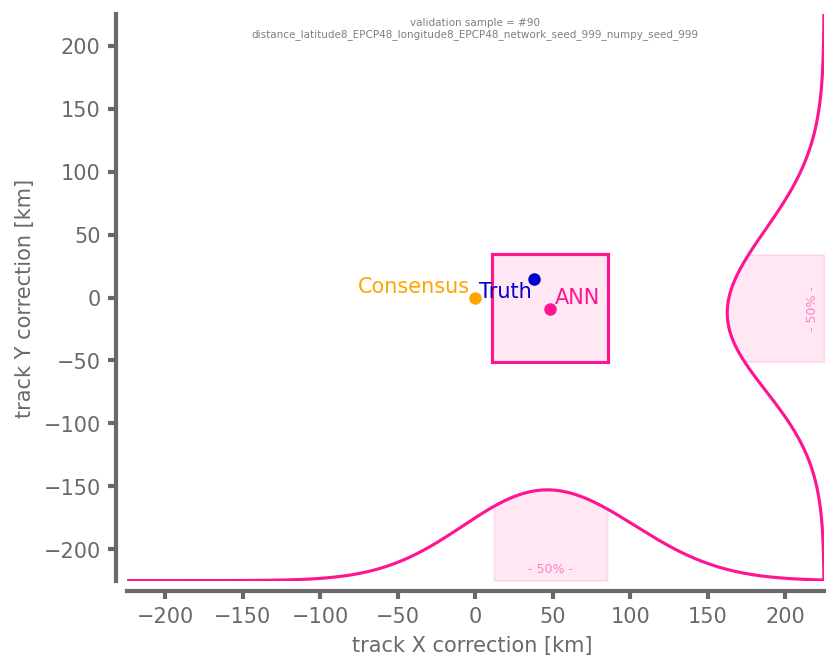

ATCF            EP06
Name         ESTELLE
Date            2016
time           71918
ftime(hr)         48
NCI                4
OBDV            -0.2
DSDV            -0.2
LGDV            -8.2
HWDV            -5.2
AVDV            13.8
VMXC            45.2
DV12             0.0
SLAT            20.4
SSTN            24.7
SHDC             2.4
DTL           1416.6
NCT                3
OBDX            38.1
AVDX           -24.2
EMDX            -0.0
EGDX            17.3
HWDX             6.9
LONC           129.3
OBDY           -63.0
AVDY            37.0
EMDY             0.0
EGDY           -18.5
HWDY           -18.5
LATC            21.0
OBDR            73.6
OBDA            -1.0
BTV             45.0
BTLAT           20.4
BTLON          128.9
Name: 16581, dtype: object

In [8]:
MS = 10
plt.figure(figsize=(6,5))
#----------------------------------------------------------------
ax = plt.subplot(111)

adjust_spines(ax, ['left', 'bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')

if(EXP_NAME_dx[-2:]=='72'):
    index = 158
    bound = 775
    scale = 100_000
else:
    index = 90
    bound = 225
    scale = 10_000
# df_dx.iloc[index]

plt.plot(0,0,'.', color='orange', markersize=MS, label='Consensus')
plt.annotate("Consensus", (0,0), color='orange', xytext=(-5,5), textcoords='offset pixels', horizontalalignment='right')

plt.plot(true_correction_dx[index],true_correction_dy[index],'.',color='mediumblue', markersize=MS, label='Truth')
plt.annotate("Truth", (true_correction_dx[index],true_correction_dy[index]), color='mediumblue', xytext=(-2.5,-2.5), textcoords='offset pixels',horizontalalignment='right', verticalalignment='top')

plt.plot(ann_correction_dx[index],ann_correction_dy[index],'.', color='deeppink', markersize=MS, label='ANN')
plt.annotate("ANN", (ann_correction_dx[index],ann_correction_dy[index]), color='deeppink', xytext=(5,5), textcoords='offset pixels')

plt.plot((ann_low_correction_dx[index],ann_high_correction_dx[index]),(ann_low_correction_dy[index],ann_low_correction_dy[index]),'-', color='deeppink')
plt.plot((ann_low_correction_dx[index],ann_high_correction_dx[index]),(ann_high_correction_dy[index],ann_high_correction_dy[index]),'-', color='deeppink')
plt.plot((ann_low_correction_dx[index],ann_low_correction_dx[index]),(ann_low_correction_dy[index],ann_high_correction_dy[index]),'-', color='deeppink')
plt.plot((ann_high_correction_dx[index],ann_high_correction_dx[index]),(ann_low_correction_dy[index],ann_high_correction_dy[index]),'-', color='deeppink')

plt.fill([ann_low_correction_dx[index], 
          ann_high_correction_dx[index], 
          ann_high_correction_dx[index], 
          ann_low_correction_dx[index], 
          ann_low_correction_dx[index]], 
         [ann_low_correction_dy[index], 
          ann_low_correction_dy[index], 
          ann_high_correction_dy[index], 
          ann_high_correction_dy[index], 
          ann_low_correction_dy[index]
         ],color='deeppink',alpha=.1)

plt.xlim(-bound,bound)
plt.ylim(-bound,bound)

# plot the x-direction PDF
x = np.arange(-1000,1000)
d = -bound + scale*shash.prob(x,
                               df['mu_pred_dx'][index],
                               df['sigma_pred_dx'][index],
                               df['gamma_pred_dx'][index],
                               df['tau_pred_dx'][index],
                              )
plt.plot(x,d,'-',color='deeppink')
x_shade = np.logical_and((x>=df['ann_low_correction_dx'][index]), (x<=df['ann_high_correction_dx'][index]))
plt.fill_between(x,d,-bound,x_shade, color='deeppink',alpha=.1)
plt.annotate("- 50% -", (df['ann_low_correction_dx'][index]+df['iqr_dx'][index]/2,-bound), color='deeppink', alpha=.5,xytext=(0,5), fontsize=6, textcoords='offset pixels',horizontalalignment='center', verticalalignment='bottom')


# plot the y-direction PDF
x = np.arange(-1000,1000)
d = bound - scale*shash.prob(x,
                               df['mu_pred_dy'][index],
                               df['sigma_pred_dy'][index],
                               df['gamma_pred_dy'][index],
                               df['tau_pred_dy'][index],
                              )
plt.plot(d,x,'-',color='deeppink')
x_shade = np.logical_and((x>=df['ann_low_correction_dy'][index]), (x<=df['ann_high_correction_dy'][index]))
plt.fill_betweenx(x,d,bound,x_shade, color='deeppink',alpha=.1)
plt.annotate("- 50% -", (bound,df['ann_low_correction_dy'][index]+df['iqr_dy'][index]/2), color='deeppink', alpha=.5,xytext=(-5,0), fontsize=6, textcoords='offset pixels',horizontalalignment='right', verticalalignment='center', rotation=90)


plt.xlabel('track X correction [km] ')
plt.ylabel('track Y correction [km]')

ax = plt.gca()
plt.text(.5, .995, 'validation sample = #' + str(index) + '\n' + MODEL_NAME,
    horizontalalignment='center',
    verticalalignment='top',
    color='tab:gray',
    fontsize=5,
    transform = ax.transAxes)    

plt.savefig('figures/proposal_plots/' + MODEL_NAME + '_track_prediction_map_' + str(index) + '.png', dpi=dpiFig)    
plt.show()

df_dx.iloc[index]

### Errors vs uncertainty estimates

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avant Garde


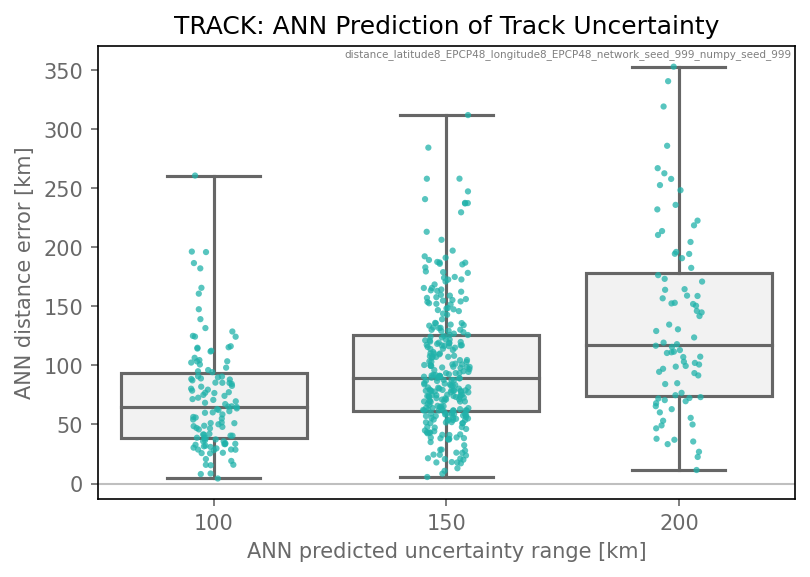

In [9]:
if(EXP_NAME_dx[-2:]=='72'):
    ROUND_BASE = 100
else:
    ROUND_BASE = 50
df_plot = df.copy()
df_plot['iqr_diag'] = pd.Series(df_plot['iqr_diag']).apply(lambda x: custom_round(x, base=ROUND_BASE))

for xvar in ('iqr_diag',):
    yvar = 'ann_error'
    
    plt.figure()
    g = sns.boxplot(
        data=df_plot,
        x=xvar, y=yvar,
        whis=100,
        palette='gray',
    )

    plt.setp(g.artists, edgecolor = '.4', facecolor='.95')
    plt.setp(g.lines, color='.4')
    ax = sns.stripplot(x=xvar, y=yvar, data=df_plot, color="lightseagreen", size=3.,alpha=.75,)
    plt.axhline(y=0,color='k', alpha=.25, linewidth=1)
    
    plt.ylabel('ANN distance error [km]')
    plt.xlabel('ANN predicted uncertainty range [km]')
    plt.title('TRACK: ANN Prediction of Track Uncertainty')

    if(EXP_NAME_dx[-2:]=='48'):
        plt.xlim(-.5,2.5)
    else:
        plt.xlim(-.5,6.5)
    
    plt.text(.995, .995, MODEL_NAME,
        horizontalalignment='right',
        verticalalignment='top',
        color='tab:gray',
        fontsize=5,
        transform = ax.transAxes)    
    
    plt.savefig('figures/proposal_plots/' + MODEL_NAME + '_boxplot_' + xvar + '_' + yvar + '.png', dpi=dpiFig)    
    plt.show()    
    

### ANN prediction of Consensus Error

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avant Garde


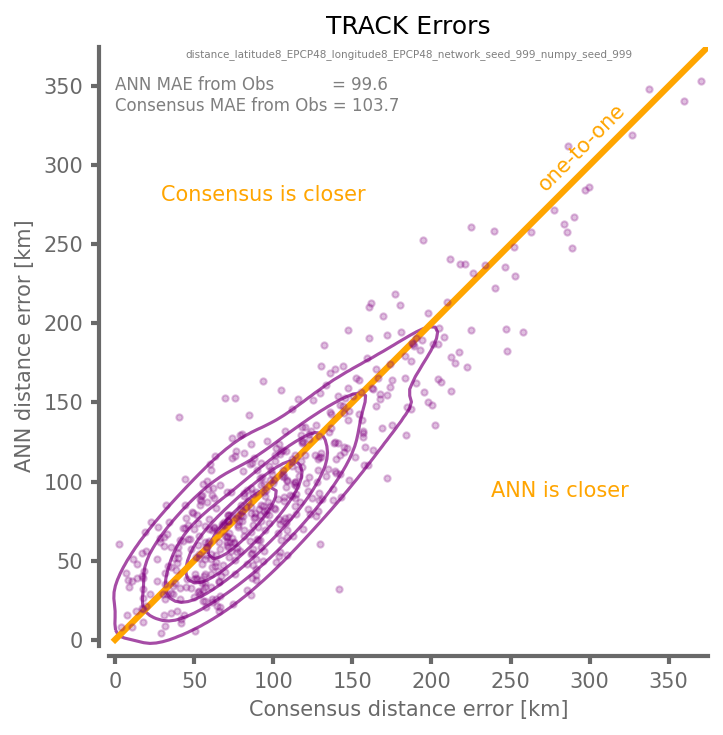

In [10]:
import scipy.stats as stats

if(EXP_NAME_dx[-2:]=='72'):
    bound=625
    inc = .000005
else:
    bound=375
    inc = .00002


plt.figure(figsize=(5,5))
ax = plt.gca()
adjust_spines(ax, ['left', 'bottom'])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params('both',length=4,width=2,which='major',color='dimgrey')

# Peform the kernel density estimate
x = df['cons_error']
y = df['ann_error']
xmin, xmax = -1000, 1000
ymin, ymax = -1000, 1000

xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values,bw_method='scott')
f = np.reshape(kernel(positions).T, xx.shape)


cfset = plt.contour(xx, yy, f, levels=np.arange(inc,.0005,inc), colors='purple', alpha=.7)
plt.plot((0,1000),(0,1000),'-',color='orange',linewidth=3.)
plt.annotate("one-to-one", (bound*.75,bound*.75), color='orange', alpha=1.,xytext=(-25,0), fontsize=10, textcoords='offset pixels',horizontalalignment='left', verticalalignment='bottom', rotation=45)
plt.plot(df['cons_error'],df['ann_error'],'.',color='purple',alpha=.25)

plt.xlim(-0.01*bound,bound)
plt.ylim(-0.01*bound,bound)

plt.annotate("ANN is closer", (bound*.75,bound*.25), color='orange', alpha=1.,xytext=(0,0), fontsize=10, textcoords='offset pixels',horizontalalignment='center', verticalalignment='center')
plt.annotate("Consensus is closer", (bound*.25,bound*.75), color='orange', alpha=1.,xytext=(0,0), fontsize=10, textcoords='offset pixels',horizontalalignment='center', verticalalignment='center')

plt.ylabel('ANN distance error [km]')
plt.xlabel('Consensus distance error [km]')
plt.title('TRACK Errors')

plt.text(.5, .995, MODEL_NAME,
    horizontalalignment='center',
    verticalalignment='top',
    color='tab:gray',
    fontsize=5,
    transform = ax.transAxes)    

t = 'ANN MAE from Obs           = ' + str(np.round(ann_mae,1)) + '\nConsensus MAE from Obs = ' + str(np.round(cons_mae,1))
plt.text(.01,.95,t,
    horizontalalignment='left',
    verticalalignment='top',
    color='tab:gray',
    fontsize=8,
    transform = ax.transAxes)  

ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('figures/proposal_plots/' + MODEL_NAME + '_kde_' + xvar + '_' + yvar + '.png', dpi=dpiFig)    
plt.show()